<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/15_Graph_Data_Preprocessing_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated Download and Extraction

In this approach, we will:
- Mount Google Drive.
- Create or navigate to a "Data" subfolder under Colab Notebooks.
- Use curl to download the .zip file from the repository.
- Extract the .zip file using unzip.
- Verify the extracted files.
- Load the dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the Data subfolder (adjust the path as necessary)
%cd /content/drive/MyDrive/Colab\ Notebooks/Data

# Download the dataset (deezer_ego_nets.zip) from the repository
!curl -O https://snap.stanford.edu/data/deezer_ego_nets.zip

# Extract the downloaded zip file
!unzip deezer_ego_nets.zip

# List the extracted files to verify the extraction
!ls -l

# (Optional) Display the first 10 lines of an extracted file to inspect its content
!head -n 10 some_extracted_file.txt


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1301k  100 1301k    0     0  1531k      0 --:--:-- --:--:-- --:--:-- 1529k
Archive:  deezer_ego_nets.zip
replace deezer_ego_nets/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: deezer_ego_nets/README.txt  
replace deezer_ego_nets/citing.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: deezer_ego_nets/citing.txt  
replace deezer_ego_nets/deezer_target.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: deezer_ego_nets/deezer_target.csv  
replace deezer_ego_nets/deezer_edges.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: deezer_ego_nets/deezer_edges.json  
total 254688
-rw------- 1 root root   114992 Feb  7 12:50 as20000102.txt
-rw------- 1 root root  1431846 Feb  7 16:06 as-caida20071105.txt
-rw------- 1 root root  

# Manual Upload Instructions

If the automated method is not feasible, or you prefer manual steps:
- Download the deezer_ego_nets.zip file from the repository to your local machine.
- Extract it locally (e.g., right-click and unzip, or use unzip on macOS/Linux).
- Create or navigate to a "Data" subfolder under Colab Notebooks in your Google Drive.
- Upload the extracted files into that "Data" subfolder.
- Open or create a Colab notebook.
- Mount Google Drive and change directory to the Colab Notebooks/Data folder.
- Load and verify the dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the Data subfolder in Colab Notebooks (adjust the path as needed)
%cd /content/drive/MyDrive/Colab\ Notebooks/Data

# List the files to verify the manual upload
!ls -l

# (Optional) Display the first 10 lines of an uploaded file to verify its content
!head -n 10 some_extracted_file.txt


In [ ]:
# Running black

from google.colab import drive

# Install nbqa and black (required each new session)
!pip install nbqa black

# Run nbqa black on all notebooks in the current directory
!nbqa black .


No notebooks found in given path(s)


# Unit 15: Data Preparation and Analysis for Deezer Ego Nets

## Section 1: Techniques for Cleaning and Preparing Large Graph Datasets

**Objective:**  
- Understand strategies for cleaning noisy graph data.  
- Recognize methods for handling missing or inconsistent node and edge information.

**Introduction:**  
- Introduce the process of cleaning large graph datasets such as Deezer Ego Nets.  
- Discuss the importance of data quality for subsequent analysis and machine learning tasks.

**Key Points:**  
- Data sanitation using filtering and imputation methods.  
- Removal of duplicate or irrelevant records.  
- Handling missing values in node attributes and edge lists.


Files in the dataset directory:
['deezer_target.csv', 'deezer_edges.json', 'citing.txt', 'README.txt']
Raw graph properties:
Number of nodes: 0
Number of edges: 0


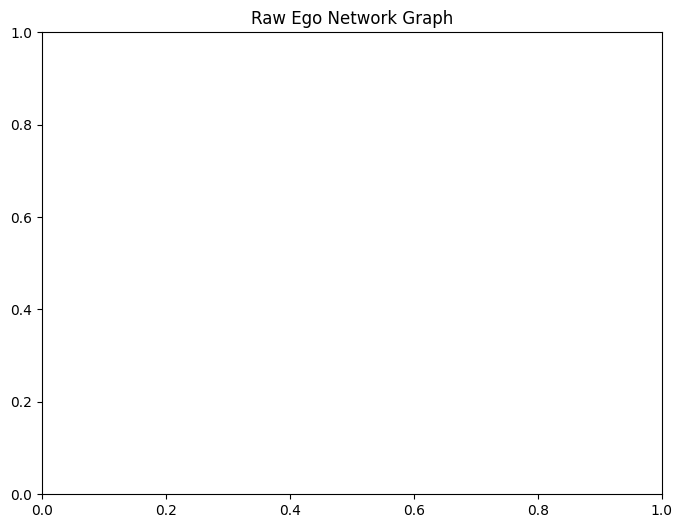

After cleaning, number of nodes: 0


In [ ]:
import os
import networkx as nx
import matplotlib.pyplot as plt

# Define the directory where the Deezer Ego Nets dataset is located
data_dir = '/content/drive/MyDrive/Colab Notebooks/Data/deezer_ego_nets'

# List files in the dataset directory to inspect the contents
files = os.listdir(data_dir)
print("Files in the dataset directory:")
print(files)

# Load a sample ego network file (assuming files are in edge list format)
sample_file = os.path.join(data_dir, files[0])
G_raw = nx.read_edgelist(sample_file)

# Display basic properties of the raw graph
print("Raw graph properties:")
print("Number of nodes:", G_raw.number_of_nodes())
print("Number of edges:", G_raw.number_of_edges())

# Visualize the raw graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G_raw, with_labels=False, node_size=50)
plt.title("Raw Ego Network Graph")
plt.show()

# Example data cleaning: Remove isolated nodes (nodes with no edges)
G_clean = G_raw.copy()
isolated_nodes = list(nx.isolates(G_clean))
G_clean.remove_nodes_from(isolated_nodes)
print("After cleaning, number of nodes:", G_clean.number_of_nodes())


**Observations & Explanations:**  
- Cleaning the dataset by removing isolated nodes enhances the overall graph quality.  
- Visualizing the raw graph helps identify noise, such as disconnected nodes and inconsistent records.  
- Comparing graph properties before and after cleaning indicates improvements in data quality.


**Practical Activities:**  
- Develop a script to filter out incomplete ego networks from the dataset.  
- Experiment with imputation techniques to handle missing node attributes.  
- Visualize and compare the graph structures before and after applying various cleaning methods.


**Quiz:**  
1. What are common techniques used to clean large graph datasets?  
2. Why is data cleaning critical for graph analysis?


## Section 2: Feature Extraction from Graph Topology and Node Attributes

**Objective:**  
- Learn methods to extract meaningful features from graph structure.  
- Understand how node attributes contribute to graph-level insights.

**Introduction:**  
- Describe the process of deriving features from both the topology of the graph and node-specific attributes.  
- Emphasize the role of feature extraction in improving model interpretability.

**Key Points:**  
- Extraction of structural metrics such as degree, centrality, and clustering coefficient.  
- Incorporation of node attributes like user demographics or interaction counts.  
- Combining topology-based features with attribute-based features for robust analysis.


Files in the dataset directory:
['deezer_target.csv', 'deezer_edges.json', 'citing.txt', 'README.txt']
Extracted Features:
         file  num_nodes  avg_degree  avg_clustering
0  citing.txt          8    1.000000             0.0
1  README.txt         19    1.473684             0.0


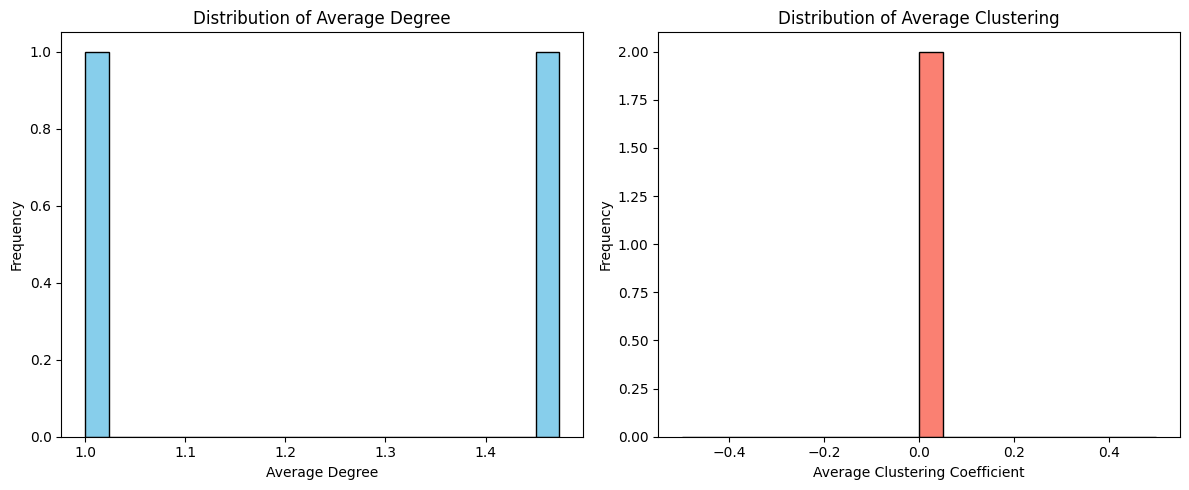

In [ ]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing Deezer Ego Nets files
data_dir = '/content/drive/MyDrive/Colab Notebooks/Data/deezer_ego_nets'
files = os.listdir(data_dir)
print("Files in the dataset directory:")
print(files)

# Process each file in the dataset directory (assuming .txt files for ego networks)
feature_list = []
for filename in files:
    if filename.endswith('.txt'):
        filepath = os.path.join(data_dir, filename)
        # Load the ego network from an edge list file, ignoring additional edge data
        G = nx.read_edgelist(filepath, data=False)
        num_nodes = G.number_of_nodes()
        # Calculate average degree
        degrees = dict(G.degree())
        avg_degree = sum(degrees.values()) / float(num_nodes) if num_nodes > 0 else 0
        # Calculate average clustering coefficient
        avg_clustering = nx.average_clustering(G) if num_nodes > 0 else 0
        feature_list.append({
            'file': filename,
            'num_nodes': num_nodes,
            'avg_degree': avg_degree,
            'avg_clustering': avg_clustering
        })

# Create a DataFrame from the extracted features
features_df = pd.DataFrame(feature_list)
print("Extracted Features:")
print(features_df.head())

# Visualize the distribution of average degree and average clustering coefficient
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(features_df['avg_degree'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average Degree')
plt.ylabel('Frequency')
plt.title('Distribution of Average Degree')

plt.subplot(1, 2, 2)
plt.hist(features_df['avg_clustering'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Average Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Average Clustering')
plt.tight_layout()
plt.show()


**Observations & Explanations:**  
- The computed metrics capture essential aspects of each ego network's structure.  
- Average degree indicates the overall connectivity, while average clustering reflects the tendency of nodes to form clusters.  
- Merging these features provides a comprehensive view of the network’s topology.

**Practical Activities:**  
- Implement additional functions to compute other centrality measures (e.g., betweenness centrality) and add them to the feature matrix.  
- Create comparative visualizations of different feature distributions across ego networks.  
- Evaluate how various feature sets impact a simple classification task on the dataset.

**Quiz:**  
1. Which structural metrics are commonly extracted from graph topology?  
2. How can node attributes enhance graph-level feature extraction?


## Section 3: Dimensionality Reduction for Large Graphs

**Objective:**  
- Understand techniques to reduce the dimensionality of graph features.  
- Learn how to visualize high-dimensional graph data in lower-dimensional spaces.

**Introduction:**  
- Introduce dimensionality reduction methods such as PCA and t-SNE for large graphs.  
- Discuss the importance of reducing complexity for visualization and analysis.

**Key Points:**  
- Application of Principal Component Analysis (PCA) to compress feature space.  
- Use of t-SNE for nonlinear dimensionality reduction and visualization.  
- Benefits of dimensionality reduction for handling high-dimensional graph data.


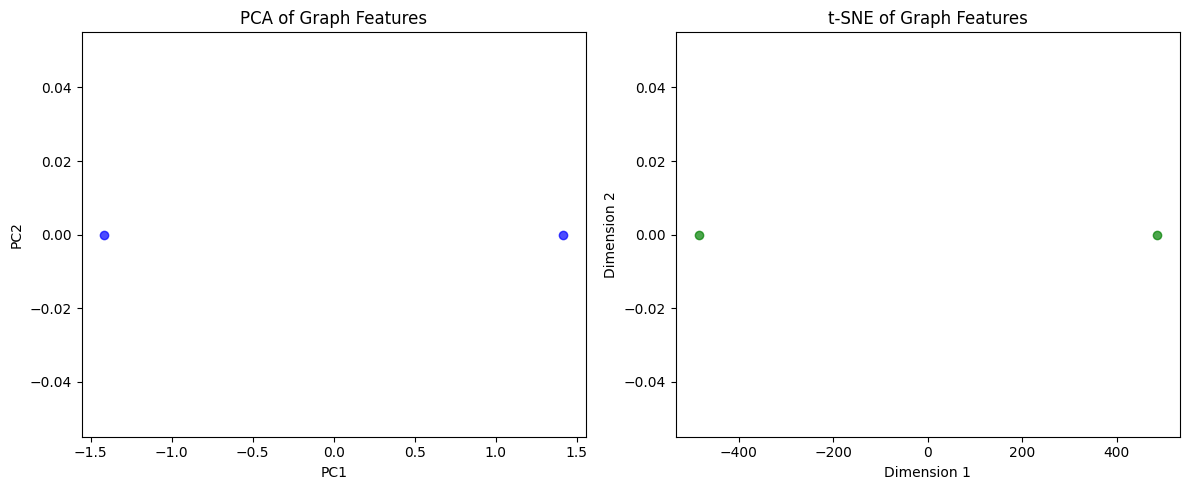

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Use features_df if available; otherwise, create a dummy DataFrame for demonstration.
if 'features_df' not in globals():
    features_df = pd.DataFrame({
        'num_nodes': np.random.randint(10, 400, 50),
        'avg_degree': np.random.rand(50) * 10,
        'avg_clustering': np.random.rand(50)
    })

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df[['num_nodes', 'avg_degree', 'avg_clustering']])

# Determine an appropriate perplexity value (must be less than number of samples)
n_samples = X_scaled.shape[0]
perplexity_value = 10 if n_samples > 10 else n_samples - 1

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE to reduce dimensions to 2 components using the adjusted perplexity
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the PCA result
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.7)
plt.title("PCA of Graph Features")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Visualize the t-SNE result
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='green', alpha=0.7)
plt.title("t-SNE of Graph Features")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

**Observations & Explanations:**  
- PCA provides a linear projection of the features that preserves maximum variance.  
- t-SNE offers a nonlinear mapping that can reveal clusters not visible through PCA.  
- Comparing both visualizations helps in understanding the inherent structure of the graph features.


**Practical Activities:**  
- Experiment with different numbers of PCA components and observe changes in the explained variance.  
- Adjust t-SNE parameters (perplexity and learning rate) and analyze their impact on the visualization.  
- Compare the clustering of graphs in the reduced feature space with any available labels.


**Quiz:**  
1. What are the advantages of using PCA for graph feature reduction?  
2. How does t-SNE differ from linear reduction techniques like PCA?


## Section 4: Best Practices for Efficient Data Handling

**Objective:**  
- Learn strategies for managing large graph datasets efficiently.  
- Recognize methods to optimize memory and processing time during data handling.

**Introduction:**  
- Large-scale graph data can strain memory and processing resources.  
- Best practices include efficient storage formats, batch processing, lazy loading, and parallel processing.

**Key Points:**  
- Efficient data storage: using binary formats or databases.  
- Batch processing and lazy loading reduce memory footprint.  
- Parallel processing and distributed systems can accelerate data handling.


In [ ]:
import pandas as pd
import time
import os

data_dir = '/content/drive/MyDrive/Colab Notebooks/Data/deezer_ego_nets'
files = os.listdir(data_dir)
print("Files in the dataset directory:")
print(files)

# Find CSV files in the directory
csv_files = [f for f in files if f.endswith('.csv')]
if not csv_files:
    print("No CSV files found in the directory. Please verify the dataset extraction.")
else:
    csv_file = os.path.join(data_dir, csv_files[0])
    chunk_size = 1000
    chunks = []
    start_time = time.time()
    for chunk in pd.read_csv(csv_file, chunksize=chunk_size, engine='python'):
        chunks.append(chunk)
    df_chunked = pd.concat(chunks, ignore_index=True)
    end_time = time.time()
    print("Chunked loading time:", end_time - start_time, "seconds")
    print("First few rows of the loaded data:")
    print(df_chunked.head())


Files in the dataset directory:
['deezer_target.csv', 'deezer_edges.json', 'citing.txt', 'README.txt']
Chunked loading time: 0.06284070014953613 seconds
First few rows of the loaded data:
   id  target
0   0       0
1   1       1
2   2       0
3   3       0
4   4       1


**Observations & Explanations:**  
- Chunking with pandas reduces memory load by processing the file in manageable pieces.  
- Lazy file reading avoids loading the entire file into memory, which is beneficial for very large files.  
- Comparing processing times helps determine the most efficient method for a given dataset.


**Practical Activities:**  
- Implement efficient data loading routines for other file formats in the Deezer Ego Nets dataset.  
- Experiment with different chunk sizes and batch sizes to optimize processing time.  
- Benchmark the performance improvements by comparing processing times before and after applying these techniques.


**Quiz:**  
1. What techniques can be used to efficiently handle large graph datasets?  
2. Why is batch processing important in data handling?


## Section 5: Integrating Graph Data into Machine Learning Workflows

**Objective:**  
- Understand how to integrate cleaned and feature-extracted graph data into ML models.  
- Learn to construct end-to-end workflows for graph-based predictive tasks.

**Introduction:**  
- Describe the process of integrating graph data into machine learning pipelines.  
- Emphasize the importance of seamless transitions from data preparation to model training.

**Key Points:**  
- Combining data cleaning, feature extraction, and dimensionality reduction into a unified pipeline.  
- Use of pipelines for reproducible and scalable machine learning tasks.  
- Integration of explainability methods to interpret graph-based predictions.


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



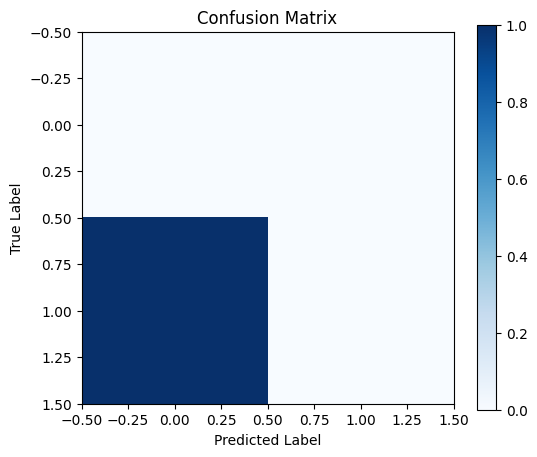

PCA Explained Variance Ratio: [nan]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Use features_df if available; otherwise, create a dummy DataFrame for demonstration.
if 'features_df' not in globals():
    features_df = pd.DataFrame({
        'num_nodes': np.random.randint(10, 400, 100),
        'avg_degree': np.random.rand(100) * 10,
        'avg_clustering': np.random.rand(100)
    })
else:
    features_df = features_df.select_dtypes(include=[np.number])

# Create synthetic labels: label 1 if avg_degree is above the median, else 0
median_avg_degree = features_df['avg_degree'].median()
labels = (features_df['avg_degree'] > median_avg_degree).astype(int)

X = features_df

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Set PCA components: choose 2 if possible, otherwise use 1
n_features = X_train.shape[1]
# Change here to ensure n_components <= min(n_samples, n_features)
pca_components = min(2, min(X_train.shape[0], n_features))

# Construct an end-to-end ML pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=pca_components)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display PCA explained variance ratio
pca_explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_
print("PCA Explained Variance Ratio:", pca_explained_variance)


**Observations & Explanations:**  
- Pipeline integration streamlines the entire workflow from preprocessing to model evaluation, reducing manual intervention.  
- The PCA component effectively reduces the feature dimensionality, aiding visualization and noise reduction.  
- Integrating all steps into a single pipeline enhances reproducibility and scalability, while also facilitating model interpretability.


**Practical Activities:**  
- Modify the pipeline to use different classifiers (e.g., SVM, Logistic Regression) and compare their performance.  
- Experiment with alternative dimensionality reduction techniques, such as t-SNE, within the pipeline.  
- Use cross-validation to further evaluate the performance of the integrated workflow.


**Quiz:**  
1. What are the benefits of integrating graph data into ML workflows?  
2. How does pipeline integration contribute to reproducibility and scalability?


## All Quiz Answers

1. **Section 1: Techniques for Cleaning and Preparing Large Graph Datasets**  
   - Common techniques include filtering, imputation, and removal of duplicate or irrelevant records.  
   - Data cleaning is critical for graph analysis because it improves data quality, leading to more reliable analysis and model performance.

2. **Section 2: Feature Extraction from Graph Topology and Node Attributes**  
   - Common structural metrics extracted from graph topology include degree, centrality, and clustering coefficient.  
   - Node attributes enhance graph-level feature extraction by providing additional context that improves model interpretability and predictive power.

3. **Section 3: Dimensionality Reduction for Large Graphs**  
   - PCA reduces dimensionality by identifying linear combinations of features that capture the maximum variance.  
   - t-SNE differs from linear techniques like PCA by preserving local structure through nonlinear mapping, which can reveal clusters in the data.

4. **Section 4: Best Practices for Efficient Data Handling**  
   - Techniques such as using efficient file formats, chunking, lazy loading, and parallel processing help manage large graph datasets effectively.  
   - Batch processing is important because it reduces memory usage and speeds up data handling by processing data in manageable segments.

5. **Section 5: Integrating Graph Data into Machine Learning Workflows**  
   - Integrating graph data into ML workflows provides end-to-end automation, ensuring seamless transitions from data preparation to model training, which enhances reproducibility and scalability.  
   - Pipeline integration contributes to reproducibility by ensuring that all processing steps are applied consistently and enables scalability by facilitating modular and maintainable workflows.
